## Практикум 8. Задание

1. Провести разведочный анализ на загруженных данных. Здесь и далее задания
выполняются на массиве транзакций по кредитным картам.

   a. Определить число строк и столбцов и их типы данных

   b. Визуализировать распределения данных по каждому столбцу (матрица
распределений. Для каждого столбца выбрать свою визуализацию)

   c. Визуализировать данные в двухмерном пространстве, проведя предварительно
анализ главных компонент

2. Провести поиск выбросов (аномалий) на загруженных данных
   
    a. Использовать Isolation Forest

    b. Использовать DBSCAN

    c. Использовать LOF

    d. Сравнить результаты

3. Использовать для поиска аномалий предварительную факторизацию с помощью PCA и
методами из п.2.
4. Интерпретировать аномалии выделенные из п.2-п.3. Определить какие аномалии
совпадают со фродовыми транзакциями.
5. Выделить решающие правила, позволяющие выделить фрод на датасете


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text

In [2]:
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv("data/creditcard.csv")

#### 1. Провести разведочный анализ на загруженных данных. Здесь и далее задания выполняются на массиве транзакций по кредитным картам.

   a. Определить число строк и столбцов и их типы данных

   b. Визуализировать распределения данных по каждому столбцу (матрица
распределений. Для каждого столбца выбрать свою визуализацию)

   c. Визуализировать данные в двухмерном пространстве, проведя предварительно
анализ главных компонент

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

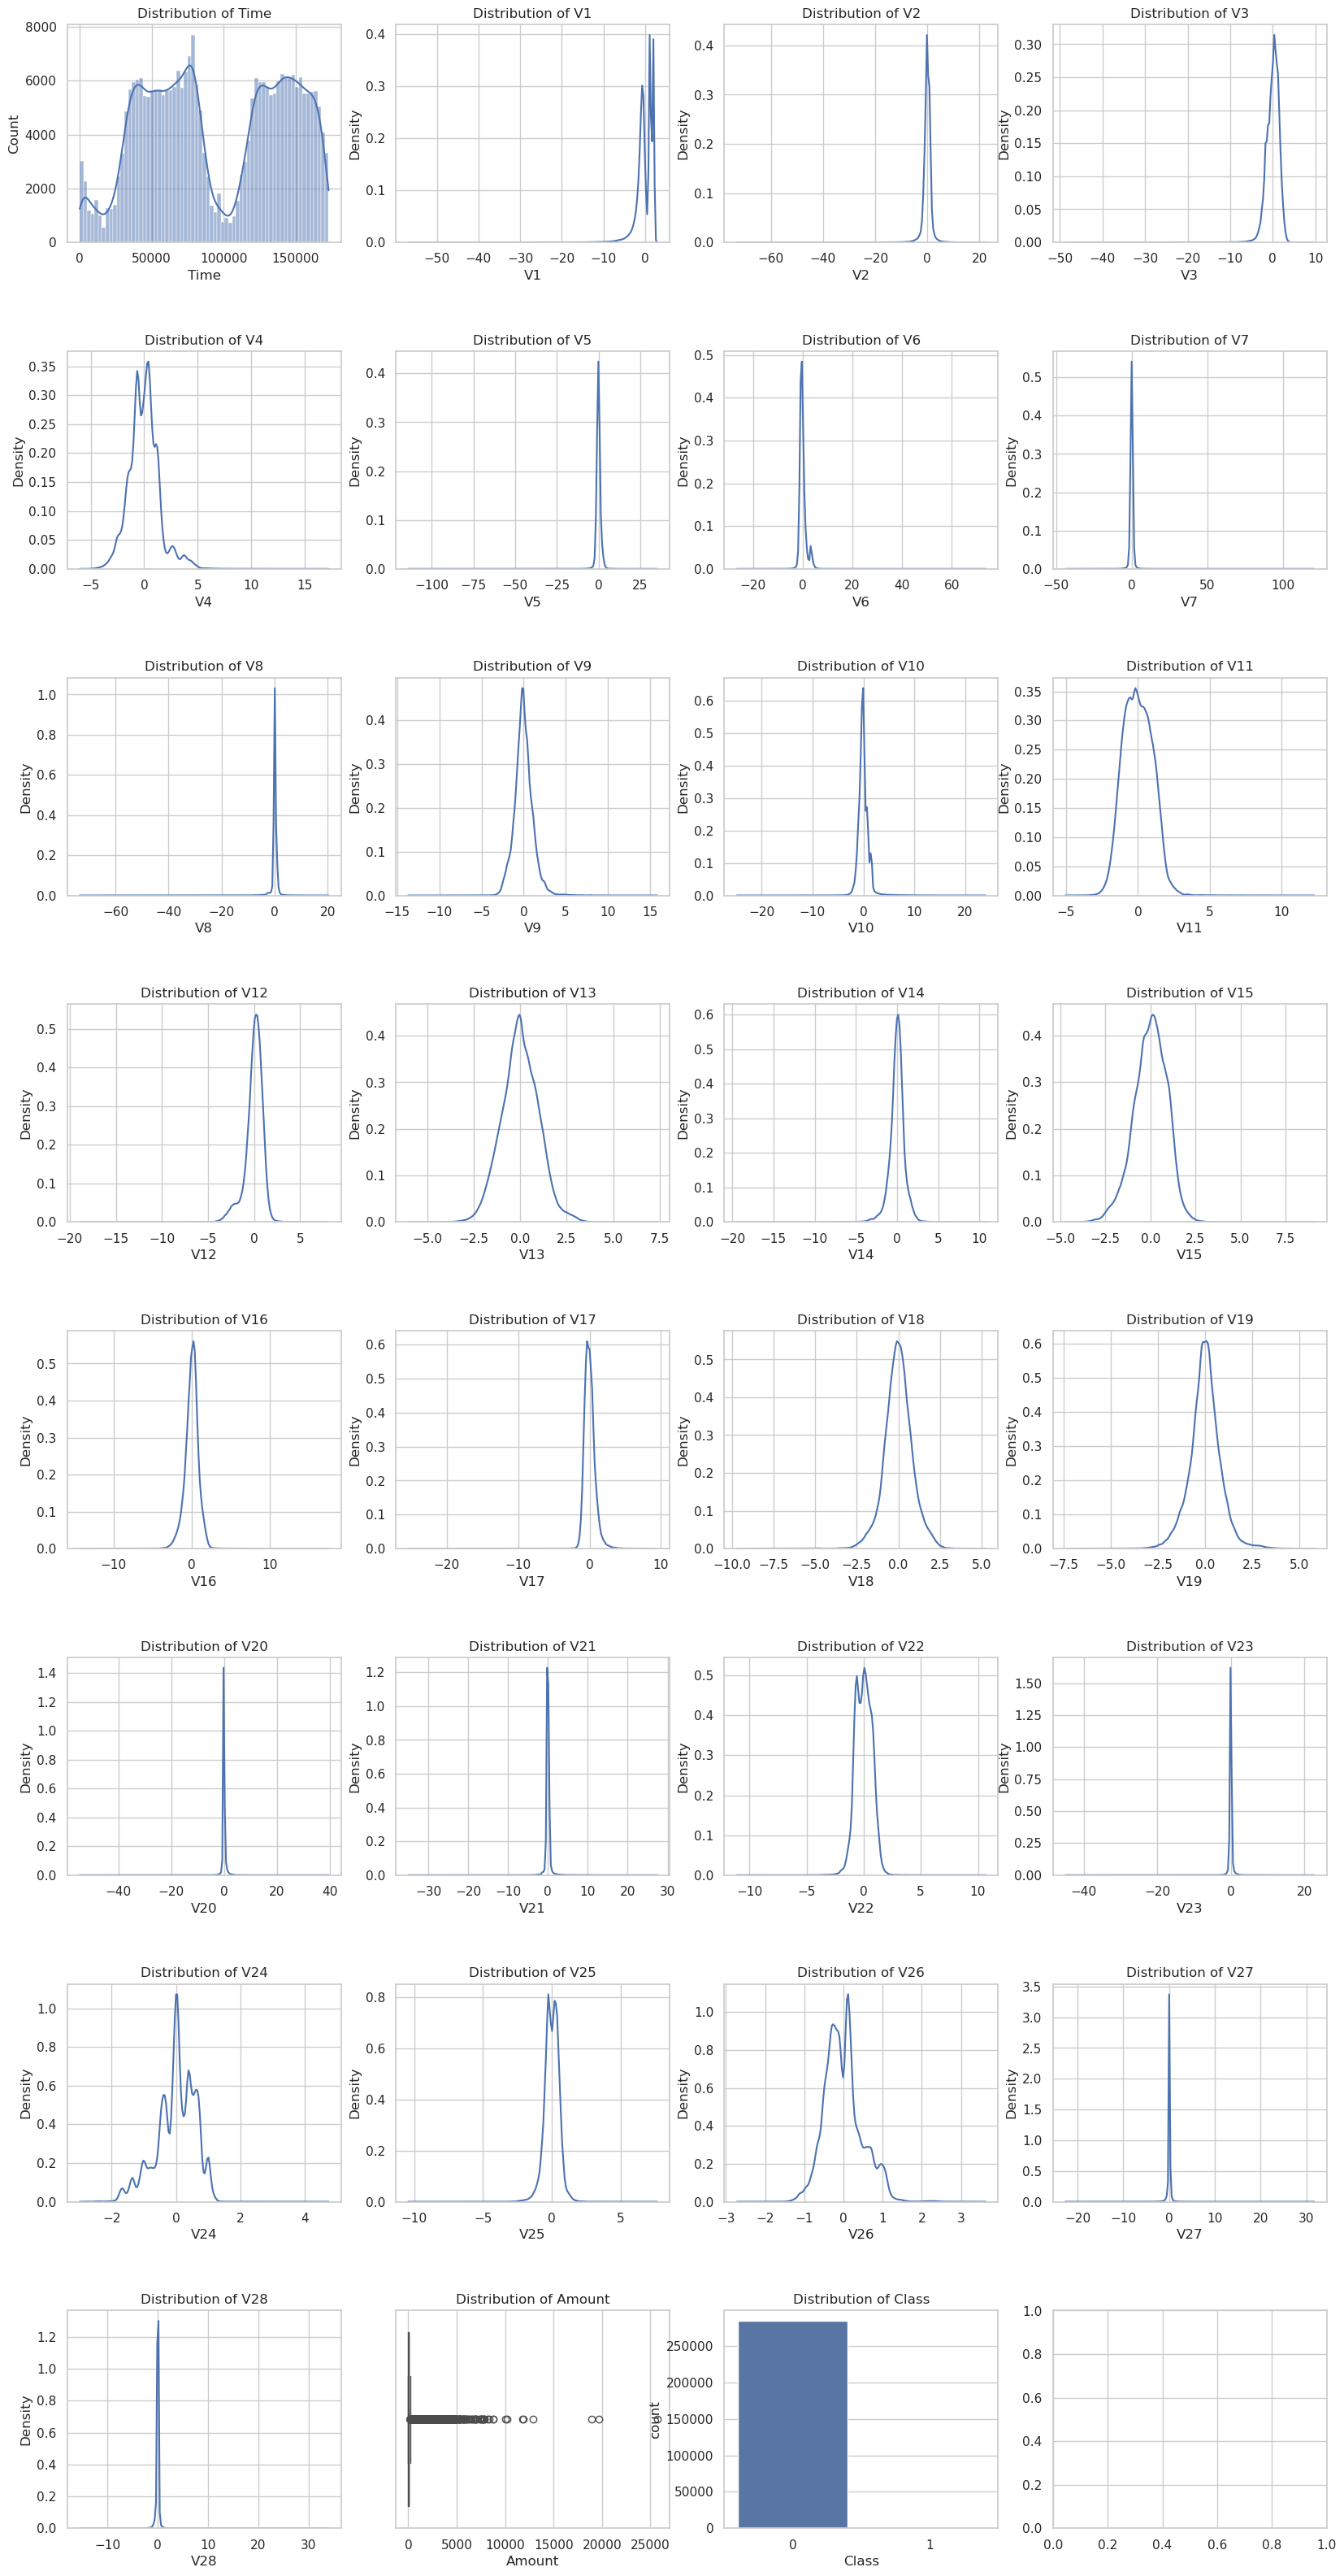

In [6]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))
fig.subplots_adjust(hspace=0.5)

columns = data.columns

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    if column == "Class":
        sns.countplot(data=data, x=column, ax=ax)
    elif column == "Amount":
        sns.boxplot(data=data, x=column, ax=ax)
    elif column == "Time":
        sns.histplot(data[column], kde=True, ax=ax)
    else:
        sns.kdeplot(data[column], ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.show()


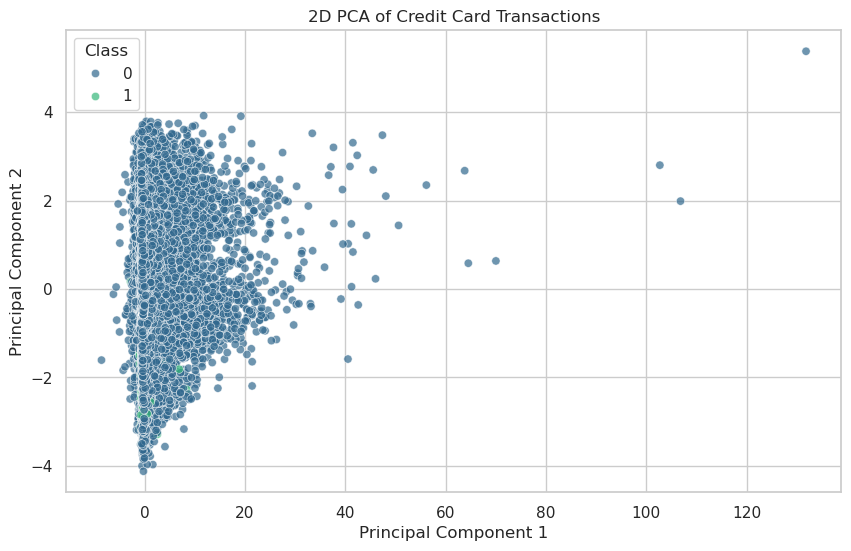

In [7]:
# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Class"]))

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=["Principal Component 1", "Principal Component 2"],
)
pca_df["Class"] = data["Class"]

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Principal Component 1",
    y="Principal Component 2",
    hue="Class",
    data=pca_df,
    palette="viridis",
    alpha=0.7,
)
plt.title("2D PCA of Credit Card Transactions")
plt.show()

#### 2. Провести поиск выбросов (аномалий) на загруженных данных
   
    a. Использовать Isolation Forest

    b. Использовать DBSCAN

    c. Использовать LOF

    d. Сравнить результаты

In [10]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data["IsoForest_Anomaly"] = iso_forest.fit_predict(scaled_data)

dbscan = DBSCAN(eps=1, min_samples=5)
data["DBSCAN_Anomaly"] = dbscan.fit_predict(scaled_data)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
data["LOF_Anomaly"] = lof.fit_predict(scaled_data)

print(
    "Isolation Forest аномалии:",
    len(data["IsoForest_Anomaly"][data["IsoForest_Anomaly"] == -1]),
)
print("DBSCAN аномалии:", len(data["DBSCAN_Anomaly"][data["DBSCAN_Anomaly"] == -1]))
print("LOF аномалии:", len(data["LOF_Anomaly"][data["LOF_Anomaly"] == -1]))

Isolation Forest аномалии: 28481
DBSCAN аномалии: 153997
LOF аномалии: 28481


#### 3. Использовать для поиска аномалий предварительную факторизацию с помощью PCA и методами из п.2.

In [11]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_data)

In [12]:
# Apply Isolation Forest on PCA-transformed data
iso_forest_pca = IsolationForest(contamination=0.1, random_state=42)
pca_df["IsoForest_Anomaly_PCA"] = iso_forest_pca.fit_predict(principal_components)

# Apply DBSCAN on PCA-transformed data
dbscan_pca = DBSCAN(eps=1, min_samples=5)
pca_df["DBSCAN_Anomaly_PCA"] = dbscan_pca.fit_predict(principal_components)

# Apply LOF on PCA-transformed data
lof_pca = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pca_df["LOF_Anomaly_PCA"] = lof_pca.fit_predict(principal_components)

print(
    "Isolation Forest PCA аномалии:",
    len(pca_df["IsoForest_Anomaly_PCA"][pca_df["IsoForest_Anomaly_PCA"] == -1]),
)
print(
    "DBSCAN PCA аномалии:",
    len(pca_df["DBSCAN_Anomaly_PCA"][pca_df["DBSCAN_Anomaly_PCA"] == -1]),
)
print(
    "LOF PCA аномалии:", len(pca_df["LOF_Anomaly_PCA"][pca_df["LOF_Anomaly_PCA"] == -1])
)


Isolation Forest PCA аномалии: 28481
DBSCAN PCA аномалии: 28266
LOF PCA аномалии: 28481


#### 4. Интерпретировать аномалии выделенные из п.2-п.3. Определить какие аномалии совпадают со фродовыми транзакциями.

In [15]:
print("Isolation Forest:")
print(
    confusion_matrix(
        data["Class"], [1 if x == 1 else 0 for x in data["IsoForest_Anomaly"]]
    )
)
print("DBSCAN:")
print(
    confusion_matrix(
        data["Class"], [1 if x != -1 else 0 for x in data["DBSCAN_Anomaly"]]
    )
)
print("LOF:")
print(
    confusion_matrix(data["Class"], [1 if x == 1 else 0 for x in data["LOF_Anomaly"]])
)
print("Isolation Forest PCA:")
print(
    confusion_matrix(
        data["Class"], [1 if x == 1 else 0 for x in pca_df["IsoForest_Anomaly_PCA"]]
    )
)
print("DBSCAN PCA:")
print(
    confusion_matrix(
        data["Class"], [1 if x != -1 else 0 for x in pca_df["DBSCAN_Anomaly_PCA"]]
    )
)
print("LOF PCA:")
print(
    confusion_matrix(
        data["Class"], [1 if x == 1 else 0 for x in pca_df["LOF_Anomaly_PCA"]]
    )
)


Isolation Forest:
[[ 28047 256268]
 [   434     58]]
DBSCAN:
[[153517 130798]
 [   480     12]]
LOF:
[[ 28407 255908]
 [    74    418]]
Isolation Forest PCA:
[[ 28058 256257]
 [   423     69]]
DBSCAN PCA:
[[ 27862 256453]
 [   404     88]]
LOF PCA:
[[ 28334 255981]
 [   147    345]]


#### 5. Выделить решающие правила, позволяющие выделить фрод на датасете

In [17]:
X = data.drop(columns=["Class", "IsoForest_Anomaly", "DBSCAN_Anomaly", "LOF_Anomaly"])
y = data["Class"]

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X, y)

tree_rules = export_text(tree_clf, feature_names=list(X.columns))
print(tree_rules)


|--- V17 <= -2.75
|   |--- V12 <= -2.18
|   |   |--- V14 <= -3.43
|   |   |   |--- V26 <= -0.26
|   |   |   |   |--- V27 <= 1.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V27 >  1.08
|   |   |   |   |   |--- class: 0
|   |   |   |--- V26 >  -0.26
|   |   |   |   |--- V1 <= -31.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- V1 >  -31.15
|   |   |   |   |   |--- class: 1
|   |   |--- V14 >  -3.43
|   |   |   |--- V8 <= -0.39
|   |   |   |   |--- V18 <= -0.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V18 >  -0.12
|   |   |   |   |   |--- class: 0
|   |   |   |--- V8 >  -0.39
|   |   |   |   |--- V23 <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- V23 >  0.67
|   |   |   |   |   |--- class: 1
|   |--- V12 >  -2.18
|   |   |--- V7 <= -4.18
|   |   |   |--- class: 1
|   |   |--- V7 >  -4.18
|   |   |   |--- class: 0
|--- V17 >  -2.75
|   |--- V14 <= -8.10
|   |   |--- V3 <= -3.16
|   |   |   |--- class: 1
|   |   |--- V3 >  -3.16
|   |   | 

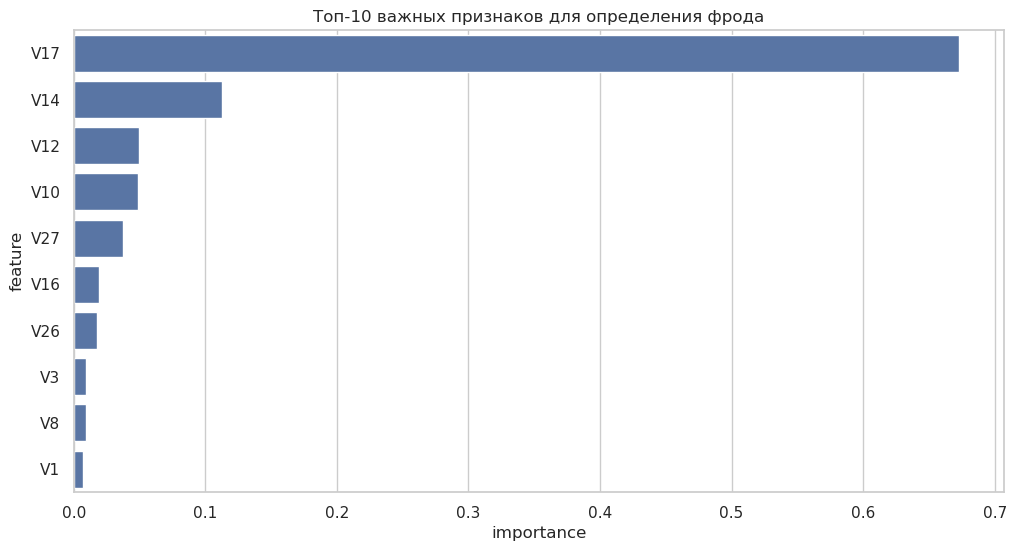

In [20]:
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": tree_clf.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="importance", y="feature", data=feature_importance.head(10))
plt.title("Топ-10 важных признаков для определения фрода")
plt.show()
